# Лабораторная работа 212: Вынужденные колебания в цепях переменного тока

In [605]:
import numpy as np
import pandas as pd

from IPython.display import Image

In [606]:
r = 50 
z = 100
L = 20 * 10 ** (-3)
C = 10 ** (-6)
R_out = 5
R_com = r + R_out
nu = np.array([400, 800, 1200])
omega = nu * 2 * np.pi

# Изучение полных сопротивлений элементов цепей переменного тока

## 1) С резистором

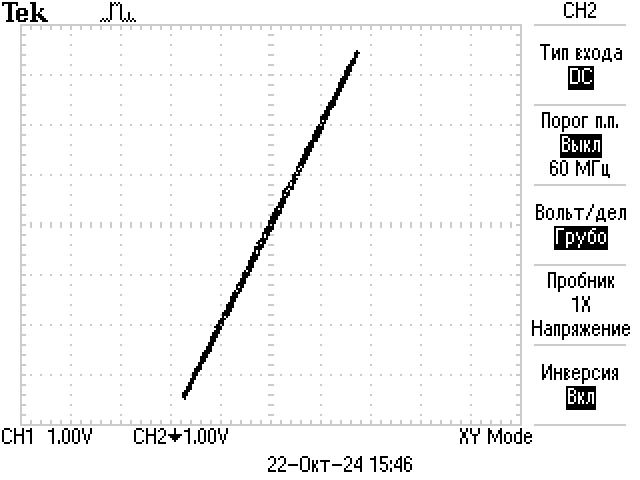

In [607]:
Image("pictures/TEK0000.jpg")

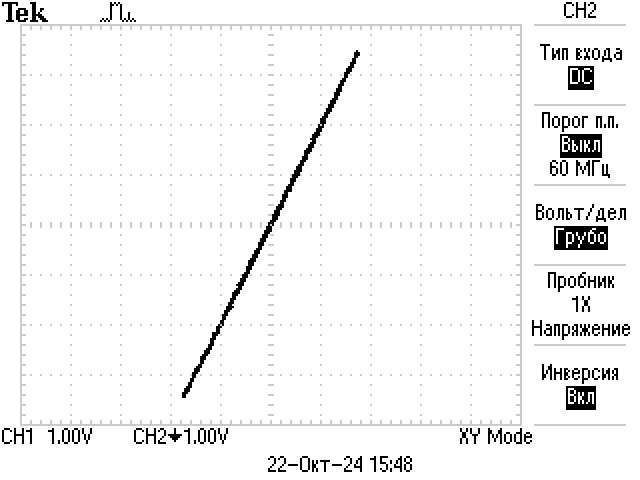

In [608]:
Image("pictures/TEK0001.jpg")

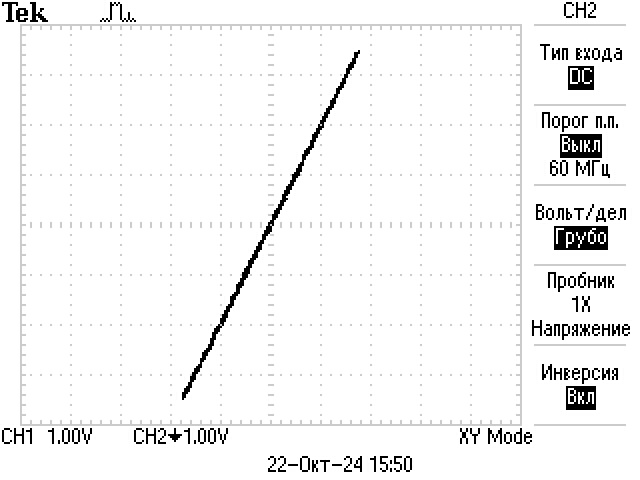

In [609]:
Image("pictures/TEK0002.jpg")

In [610]:
Uz = np.array([2.41, 2.41, 2.409]) * (2 ** 0.5)
Ur = np.array([1.2, 1.205, 1.204]) * (2 ** 0.5)

I = Uz / z

In [611]:
df = pd.DataFrame({"Частота, Гц": nu, 
                   "Uz, В": Uz, 
                   "Ur, В": Ur, 
                   "Ток, А": I, 
                   "Разность фаз": [0, 0, 0], 
                   "Полное сопротивление, Ом": np.array([z + R_com]*3)})
df

,"Частота, Гц","Uz, В","Ur, В","Ток, А",Разность фаз,"Полное сопротивление, Ом"
0,400,3.408255,1.697056,0.034083,0,155
1,800,3.408255,1.704127,0.034083,0,155
2,1200,3.406840,1.702713,0.034068,0,155


## 2) С индуктивностью

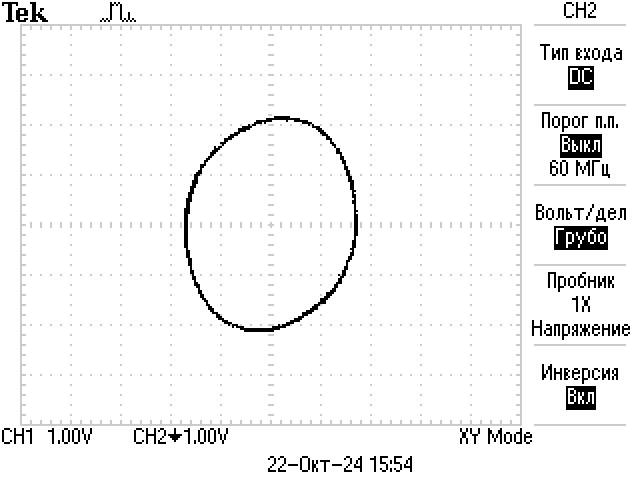

In [612]:
Image("pictures/TEK0003.jpg")

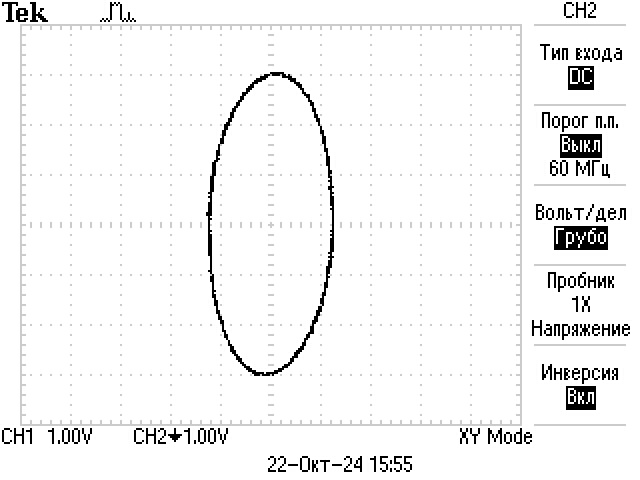

In [613]:
Image("pictures/TEK0004.jpg")

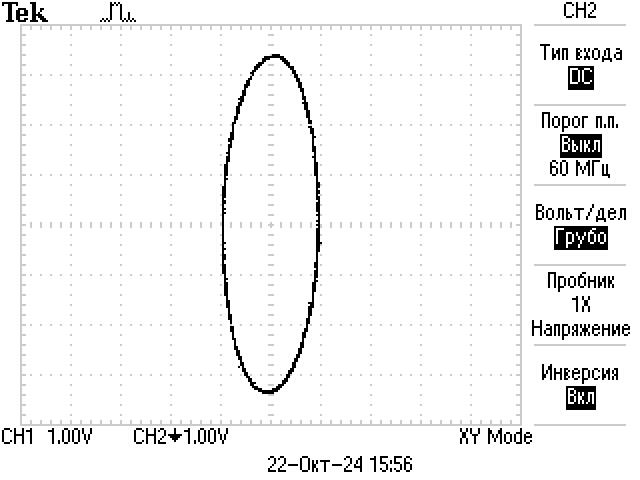

In [614]:
Image("pictures/TEK0005.jpg")

In [615]:
Ur = np.array([1.17, 0.85, 0.66]) * (2 ** 0.5)
Ul = np.array([1.51, 2.12, 2.36]) * (2 ** 0.5)

I = Ur / R_com

ind_R_pr = Ul / I
ind_R_th = (R_com ** 2 + (omega * L) ** 2) ** 0.5

In [616]:
df = pd.DataFrame({"Частота, Гц": nu, 
                   "Ul, В": Ul, 
                   "Ur, В": Ur, 
                   "Ток, А":I, 
                   "Разность фаз":["π/2", "π/2", "π/2"], 
                   "Полное сопротивление (теоретическое), Ом": ind_R_th, 
                   "Полное сопротивление (практическое), Ом": ind_R_pr})
df

,"Частота, Гц","Ul, В","Ur, В","Ток, А",Разность фаз,"Полное сопротивление (теоретическое), Ом","Полное сопротивление (практическое), Ом"
0,400,2.135462,1.654630,0.030084,π/2,74.509186,70.982906
1,800,2.998133,1.202082,0.021856,π/2,114.592648,137.176471
2,1200,3.337544,0.933381,0.016971,π/2,160.513453,196.666667


## 3) С конденсатором

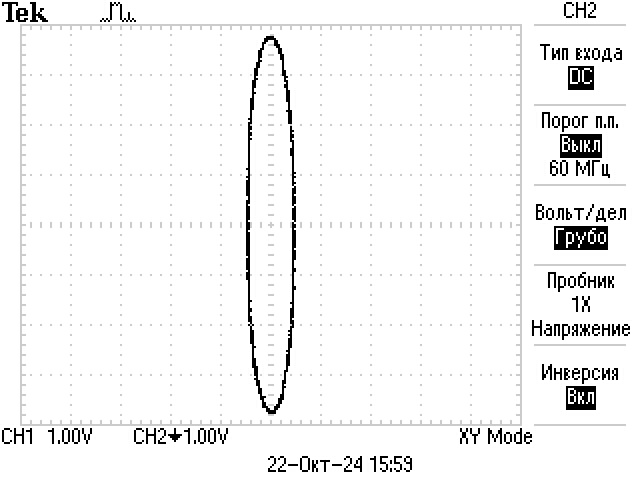

In [617]:
Image("pictures/TEK0006.jpg")

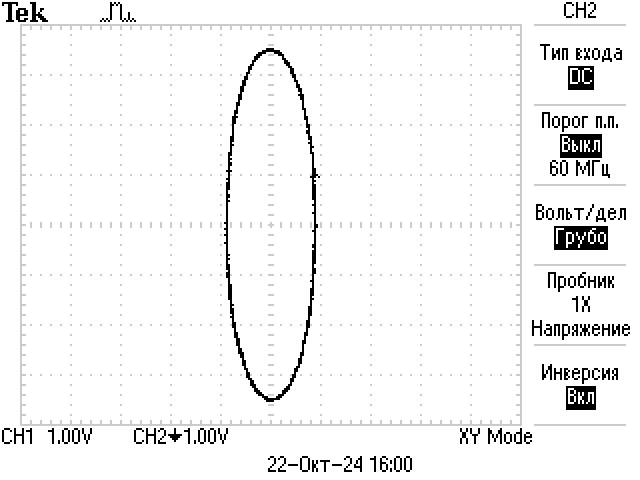

In [618]:
Image("pictures/TEK0007.jpg")

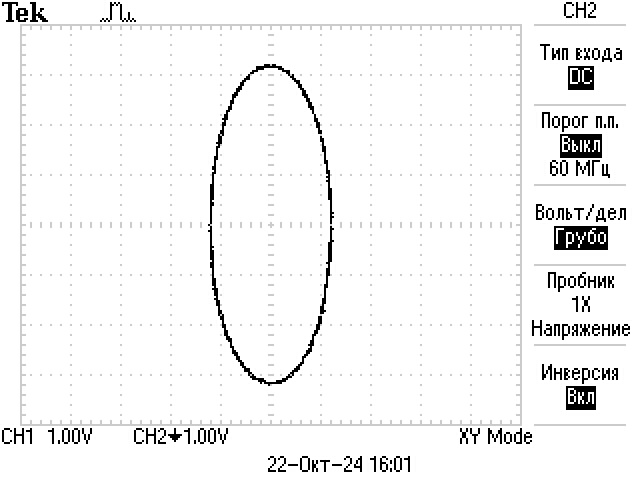

In [619]:
Image("pictures/TEK0008.jpg")

In [620]:
Ur = np.array([0.33, 0.62, 0.85]) * (2 ** 0.5)
Uc = np.array([2.63, 2.45, 2.22]) * (2 ** 0.5)

I = Ur / R_com

cond_R_pr = Uc / I
cond_R_th = (R_com ** 2 + 1 / (omega * C) ** 2) ** 0.5

In [621]:
df = pd.DataFrame({"Частота, Гц": nu, 
                   "Uc, В": Uc , 
                   "Ur, В": Ur, 
                   "Ток, А": I, 
                   "Разность фаз": ["π/2", "π/2", "π/2"], 
                   "Полное сопротивление (теоретическое), Ом": cond_R_th, 
                   "Полное сопротивление (практическое), Ом": cond_R_pr})
df

,"Частота, Гц","Uc, В","Ur, В","Ток, А",Разность фаз,"Полное сопротивление (теоретическое), Ом","Полное сопротивление (практическое), Ом"
0,400,3.719382,0.466690,0.008485,π/2,401.670698,438.333333
1,800,3.464823,0.876812,0.015942,π/2,206.406365,217.338710
2,1200,3.139554,1.202082,0.021856,π/2,143.580929,143.647059


# Изучение процесса установления колебаний (сложная схема (сопротивление и конденсатор))

## Расчет разности фаз

$\psi = arctg \left( \frac{Lω - \frac{1}{ωC}}{R} \right)$

## Расчет добротности

$Q_{th} = \frac{1}{R} \sqrt{\frac{L}{C}}$

$Q_{pr} = \frac{ω}{Δω} = \frac{ν}{Δν}$ 

#### 10 Ом

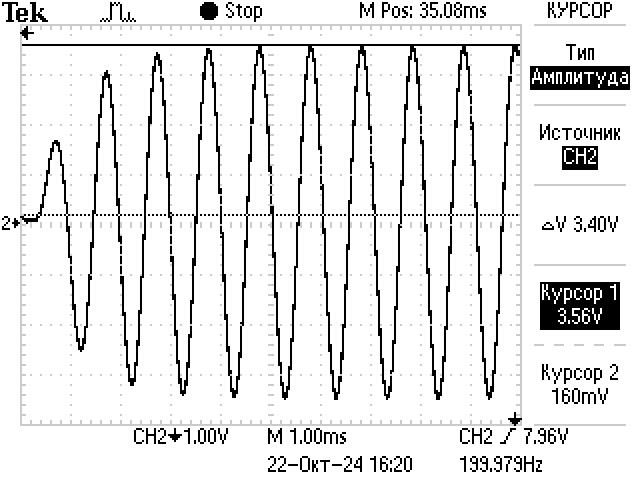

In [622]:
Image("pictures/TEK0009.jpg")

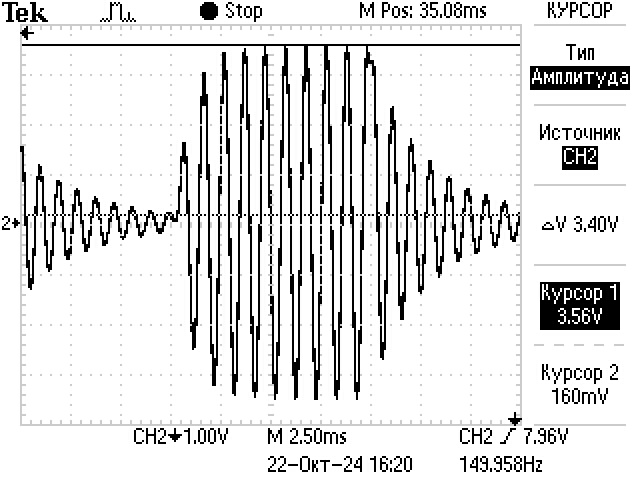

In [623]:
Image("pictures/TEK0010.jpg")

In [624]:
R_proc = 10
R = r + R_proc

nu = np.array([770, 975, 1180])

omega = nu * 2 * np.pi
psi = np.arctan((L*omega - (1 / (omega * C)))/R_proc)* 180/np.pi

U_amp = np.array([3.6 * 0.7, 3.6, 3.6 * 0.7]) * (2 ** 0.5)

Q_pr = nu[1] / (nu[2] - nu[0])
Q_th = 1 / R * ((L/C) ** 0.5)

df = pd.DataFrame({"Частота, Гц": nu, 
                   "Амплитуда, В": U_amp, 
                   "Разность фаз": psi,
                   "Добротность (теоретическая)": np.array(Q_th), 
                   "Добротность (практическая)": np.array(Q_pr)})
df

,"Частота, Гц","Амплитуда, В",Разность фаз,Добротность (теоретическая),Добротность (практическая)
0,770,3.563818,-84.802454,2.357023,2.378049
1,975,5.091169,-76.200332,2.357023,2.378049
2,1180,3.563818,53.279677,2.357023,2.378049


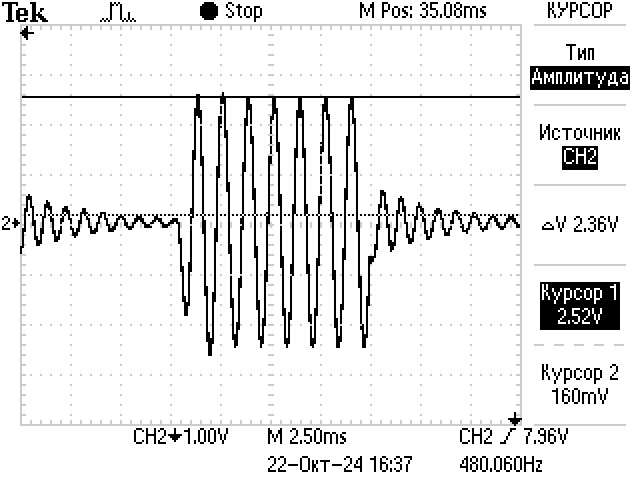

In [625]:
Image("pictures/TEK0015.jpg")

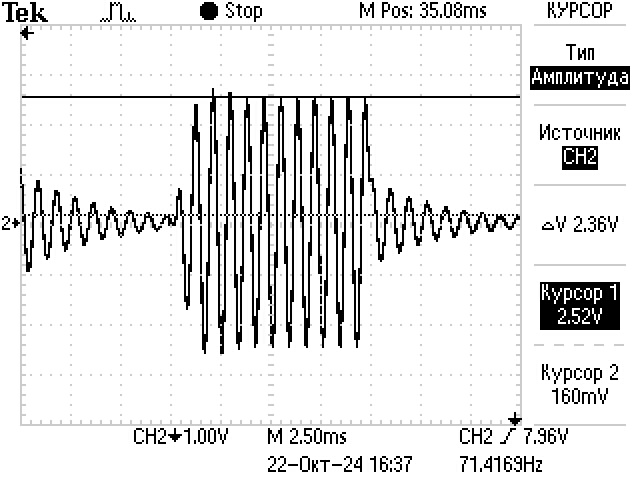

In [626]:
Image("pictures/TEK0016.jpg")

#### 20 Ом

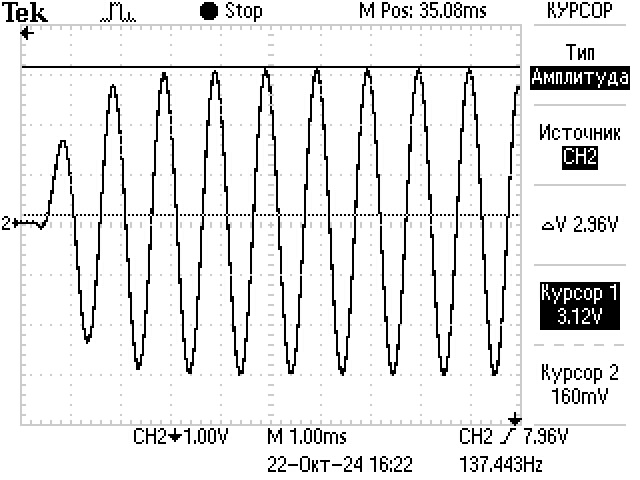

In [627]:
Image("pictures/TEK0011.jpg")

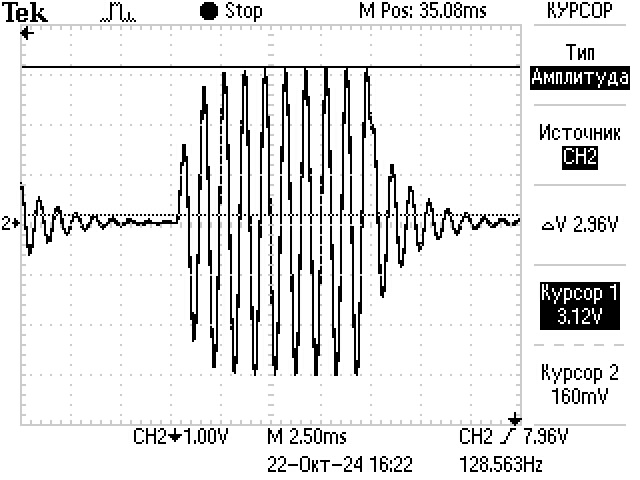

In [628]:
Image("pictures/TEK0012.jpg")

In [629]:
R_proc = 20
R = r + R_proc

nu = np.array([710, 975, 1200])

omega = nu * 2 * np.pi
psi = np.arctan((L*omega - (1 / (omega * C)))/R_proc)* 180/np.pi

U_amp = np.array([3.1 * 0.7, 3.1, 3.1 * 0.7]) * (2 ** 0.5)

Q_pr = nu[1] / (nu[2] - nu[0])
Q_th = 1 / R * ((L/C) ** 0.5)

df = pd.DataFrame({"Частота, Гц": nu, 
                   "Амплитуда, В": U_amp, 
                   "Разность фаз": psi,
                   "Добротность (теоретическая)": np.array(Q_th), 
                   "Добротность (практическая)": np.array(Q_pr)})
df

,"Частота, Гц","Амплитуда, В",Разность фаз,Добротность (теоретическая),Добротность (практическая)
0,710,3.068843,-81.569378,2.020305,1.989796
1,975,4.384062,-63.838122,2.020305,1.989796
2,1200,3.068843,42.250953,2.020305,1.989796


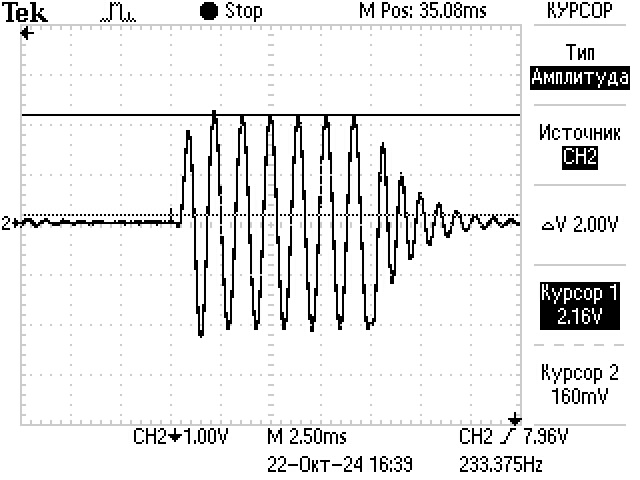

In [630]:
Image("pictures/TEK0017.jpg")

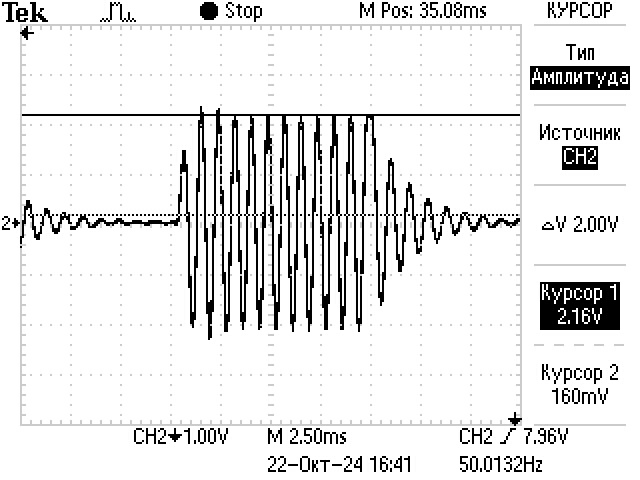

In [631]:
Image("pictures/TEK0018.jpg")

### 30 Ом

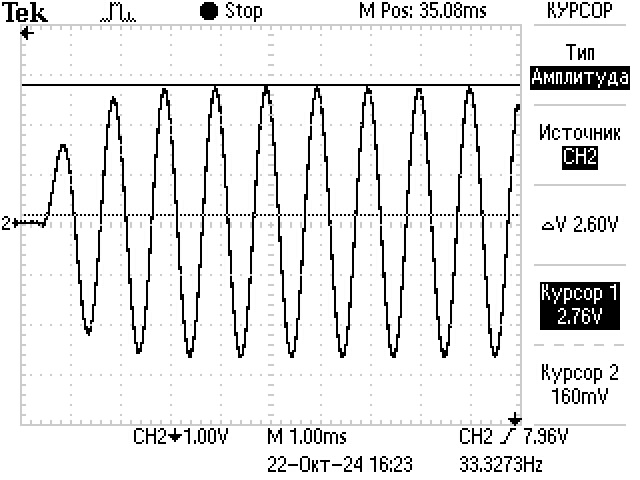

In [632]:
Image("pictures/TEK0013.jpg")

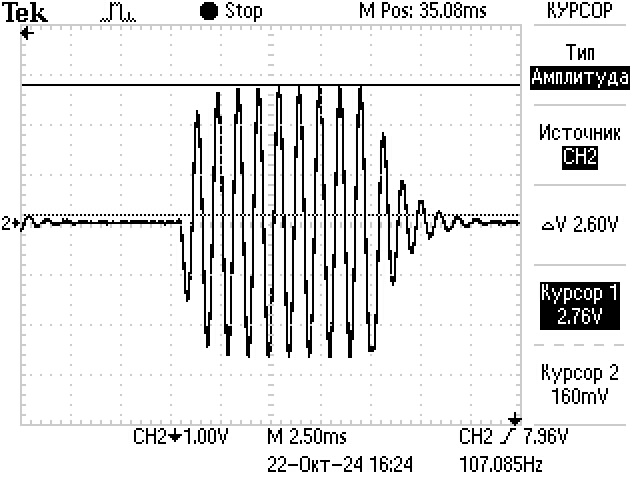

In [633]:
Image("pictures/TEK0014.jpg")

In [634]:
R_proc = 30
R = r + R_proc

nu = np.array([650, 975, 1220])

omega = nu * 2 * np.pi
psi = np.arctan((L*omega - (1 / (omega * C)))/R_proc)* 180/np.pi

U_amp = np.array([2.7 * 0.7, 2.7, 2.7 * 0.7]) * (2 ** 0.5)

Q_pr = nu[1] / (nu[2] - nu[0])
Q_th = 1 / R * ((L/C) ** 0.5)

df = pd.DataFrame({"Частота, Гц": nu, 
                   "Амплитуда, В": U_amp, 
                   "Разность фаз": psi,
                   "Добротность (теоретическая)": np.array(Q_th), 
                   "Добротность (практическая)": np.array(Q_pr)})
df

,"Частота, Гц","Амплитуда, В",Разность фаз,Добротность (теоретическая),Добротность (практическая)
0,650,2.672864,-79.582245,1.767767,1.710526
1,975,3.818377,-53.615272,1.767767,1.710526
2,1220,2.672864,37.301178,1.767767,1.710526


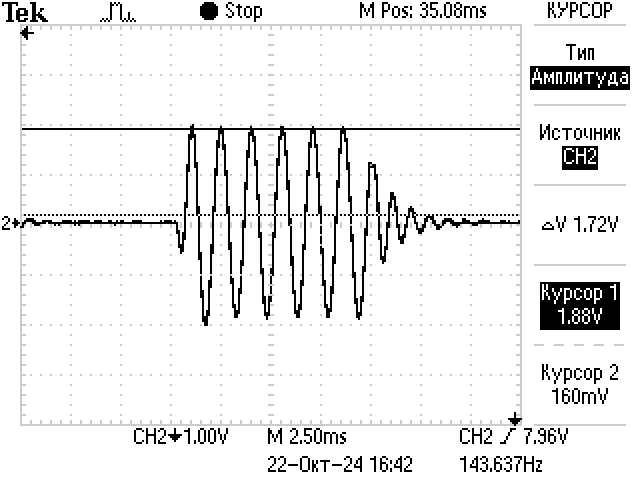

In [635]:
Image("pictures/TEK0019.jpg")

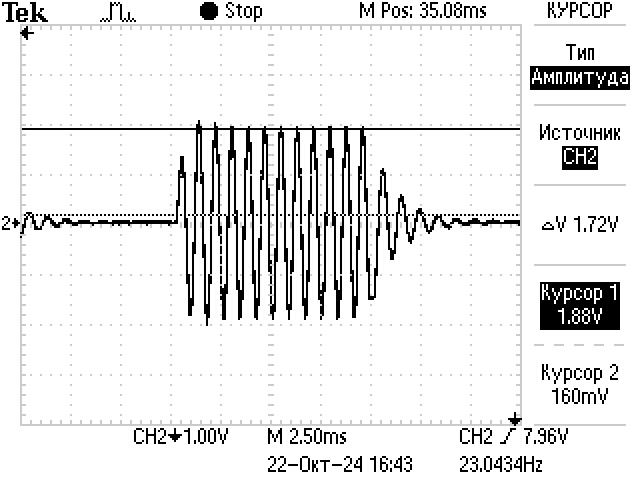

In [636]:
Image("pictures/TEK0020.jpg")